In [6]:
from datasets.datasetgetter import get_dataset, Compose, get_dataset_for_clip_embedded_image
from datasets.custom_dataset import DatasetDumped, ImageFolderRemap, ImageFolderRemapStyleAttraction, DatasetForCLIPEmbeddedImage
from PIL import Image
from IPython.display import display
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
import time
from tqdm import tqdm

from clipfont import clip
clip_model, clip_preprocess = clip.load("ViT-B/32", device="cuda")

In [3]:
img_size = 80
input_ch = 1
if input_ch == 1:
    mean = [0.5]
    std = [0.5]
else:
    mean = [0.5, 0.5, 0.5]
    std = [0.5, 0.5, 0.5]

normalize = transforms.Normalize(mean=mean, std=std)
transform = Compose([transforms.Resize((img_size, img_size)),
                             transforms.ToTensor(),
                             normalize])
root_path = '../grayscale_images_200/'
data_path = '../gwfonts-images-DG-Font/'

In [5]:
dataset = DatasetForCLIPEmbeddedImage(root_path, data_path, clip_model, clip_preprocess=clip_preprocess, transform=transform, input_ch=input_ch)

Finish embedding images


In [7]:
data_loader = DataLoader(dataset, batch_size=2, shuffle=False, num_workers=0, pin_memory=True)

In [8]:
it = iter(data_loader)
embedded_image, image, label = next(it)

tensor([0, 1])


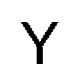

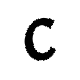

tensor([2, 3])


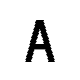

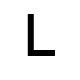

tensor([4, 5])


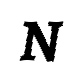

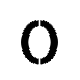

tensor([6, 7])


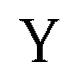

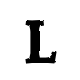

tensor([8, 9])


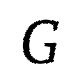

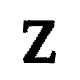

tensor([10, 11])


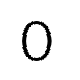

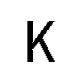

tensor([12, 13])


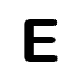

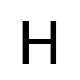

tensor([14, 15])


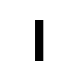

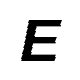

tensor([16, 17])


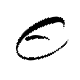

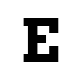

tensor([18, 19])


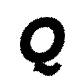

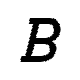

tensor([20, 21])


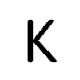

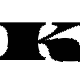

In [14]:
count = 0
for batch in data_loader:
    embedded_image, image, label = batch
    print(label)
    display(to_pil_image(image[0]))
    display(to_pil_image(image[1]))
    count += 1
    if count > 10:
        break

In [2]:
mean = [0.5]
std = [0.5]
normalize = transforms.Normalize(mean=mean, std=std)
img_size = 80
transform = Compose([transforms.Resize((img_size, img_size)),
                         transforms.ToTensor(),
                         normalize])

In [4]:
img_dir = '../refined-fonts-images'
batch_size = 4
remap_table = {i: i for i in range(265)}
img_dataset = ImageFolderRemapStyleAttraction(img_dir, transform=transform, remap_table=remap_table, input_ch=1, batch_size=batch_size)

In [5]:
img_data_loader = torch.utils.data.DataLoader(
    img_dataset,
    batch_size=4,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    drop_last=False)

In [8]:
it =  iter(img_data_loader)

In [14]:
start = time.time()
for i in tqdm(range(5000)):
    next(it)
end = time.time()
print(end - start)

100%|██████████| 5000/5000 [00:09<00:00, 554.81it/s]

9.015547037124634


In [24]:
img_dataset = ImageFolderRemapStyleAttraction(img_dir, transform=transform, remap_table=remap_table, input_ch=1, batch_size=16)
img_data_loader = torch.utils.data.DataLoader(
    img_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=8,
    pin_memory=True,
    drop_last=False)

100%|██████████| 5000/5000 [00:15<00:00, 329.14it/s]

15.194691896438599


In [25]:
it =  iter(img_data_loader)

In [26]:
start = time.time()
for i in tqdm(range(5000)):
    next(it)
end = time.time()
print(end - start)

100%|██████████| 5000/5000 [00:14<00:00, 335.40it/s]

14.915380239486694


In [12]:
tmp_styles, tmp_style_y, tmp_sty_cnt_idx = next(it)

In [13]:
tmp_styles = torch.cat(tmp_styles, dim=0)
tmp_style_y = torch.cat(tmp_style_y, dim=0)
tmp_sty_cnt_idx = torch.cat(tmp_sty_cnt_idx, dim=0)
print(tmp_styles.shape)

torch.Size([16, 1, 80, 80])


In [17]:
tmp_styles.dtype

torch.float32

In [22]:
tmp_style_y[0:-1:16]

tensor([54, 54])

In [13]:
print(tmp_style_y)
print(tmp_sty_cnt_idx)

tensor([173, 128,  73, 148,  80,  22, 243, 199, 169, 264, 169,  99, 178, 180,
        103, 189, 173, 128,  73, 148,  80,  22, 243, 199, 169, 264, 169,  99,
        178, 180, 103, 189])
tensor([ 661,  678,    8,  463, 1191, 1808,  331, 1684,  123, 1985, 1163, 1715,
        1732,  353, 1231,  841,  662,  679,    9,  464, 1192, 1809,  332, 1685,
         124, 1986, 1164, 1716, 1733,  354, 1232,  842])


In [16]:
torch.cat(tmp_style_y, dim=0)

tensor([ 54,  60, 249, 148, 157, 185,  39, 220, 197, 182, 208, 170, 131, 221,
         52,  17,  54,  60, 249, 148, 157, 185,  39, 220, 197, 182, 208, 170,
        131, 221,  52,  17])

In [28]:
x, font_id, cnt_idx = img_dataset.__getitem__(65)
print(font_id[0])

0


In [32]:
len(font_id)

32

In [14]:
font_id

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
for _ in tqdm(it):
    pass

100%|██████████| 10229/10229 [01:41<00:00, 101.06it/s]


In [8]:
# convert list to tensor
x = torch.cat(x, dim=0)
font_id = torch.cat(font_id, dim=0)
cnt_idx = torch.cat(cnt_idx, dim=0)
print(x.shape)
print(font_id.shape)
print(cnt_idx.shape)

torch.Size([32, 1, 80, 80])
torch.Size([32])
torch.Size([32])


In [9]:
font_id

tensor([[145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145,
         145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145, 145,
         145, 145, 145, 145]])

In [19]:
# convert list to tensor
x = torch.cat(x, dim=0)
font_id = torch.cat(font_id, dim=0)
cnt_idx = torch.cat(cnt_idx, dim=0)

In [21]:
print(font_id.shape)
print(cnt_idx.shape)

torch.Size([32])
torch.Size([32])


In [24]:
print(torch.stack(x, dim=0).shape)
print(torch.cat(x, dim=0).shape)


torch.Size([32, 1, 1, 80, 80])
torch.Size([32, 1, 80, 80])


In [16]:
x[0]

torch.Size([1, 80, 80])

In [ ]:
# dataset = DatasetDumped(obj_path, transform, 1)
# data_loader = torch.utils.data.DataLoader(
#         dataset,
#         batch_size=32,
#         shuffle=False,
#         num_workers=8,
#         pin_memory=True,
#         drop_last=False)

In [ ]:
# start = time.time()
# for (img, target_id) in iter(data_loader):
#     pass
# end = time.time()
# print(end - start)

In [18]:
img_dir = '../font-images'
remap_table = {i: i for i in range(265)}
img_dataset = ImageFolderRemap(img_dir, transform=transform, remap_table=remap_table, input_ch=1)

In [19]:
img_data_loader = torch.utils.data.DataLoader(
    img_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=8,
    pin_memory=True,
    drop_last=False)

In [20]:
it = iter(img_data_loader)


In [21]:
start = time.time()
for i in tqdm(range(5000)):
    next(it)
end = time.time()
print(end - start)

100%|██████████| 5000/5000 [00:07<00:00, 708.22it/s]

7.062575101852417


In [ ]:
x, y, z = next(it)

In [ ]:
for (x, y, z) in it:
    print(y, z)

In [ ]:
torch.cat([x] * 8, 0).shape

In [ ]:
# confirm if the all elements of y are the same
y.eq(0).all()

In [ ]:
z = torch.rand((16, 16))

In [ ]:
torch.sqrt(torch.mean())


In [ ]:
z1 = torch.tensor([1.5,1.5])
z2 = torch.tensor([2.5,2.5])
z3 = torch.tensor([1.0, 2.0])
z4 = z3

In [ ]:
torch.var(torch.stack([z3, z4]), dim=0)

In [ ]:
torch.stack([z3, z4])

In [ ]:
torch.var(torch.stack([z3, z4]))

In [ ]:
torch.mean(torch.var(z, dim=0))

In [ ]:
torch.var(z)

In [ ]:
mse_loss = torch.nn.MSELoss()

In [ ]:
torch.mean((z1 - z3) ** 2)

In [ ]:
mse_loss(z1, z2)

In [ ]:
torch.var(z)

In [ ]:
torch.var(z3)

In [ ]:
def calc_style_norm(style):
    style_mean = torch.mean(style, dim=0)
    style_mean_norm = torch.norm(style_mean)
    norm_sum = 0
    for i in range(style.shape[0]):
        norm_sum += torch.norm(style[i] - style_mean)
    return norm_sum / style_mean_norm

In [ ]:
z = torch.rand((16, 256, 20, 20))

In [ ]:
z_mean = torch.mean(z, 0)

In [ ]:
z_mean.shape

In [ ]:
def calc_content_norm(content):
    content_mean = torch.mean(content, dim=0)
    norm_sum = 0
    for i in range(content.shape[0]):
        norm_sum += torch.norm(content[i] - content_mean)
    return norm_sum

In [ ]:
calc_content_norm(z)

In [ ]:
x = torch.rand((256, 20, 20))
y = torch.cat([x.unsqueeze(0) for _ in range(16)], 0)

In [ ]:
calc_content_norm(y)

In [ ]:
z_mean.shape

In [ ]:
def calc_content_norm(content):
    content_mean = torch.mean(content, dim=0)
    norm_sum = 0
    for i in range(content.shape[0]):
        norm_sum += torch.norm(content[i] - content_mean)
    return norm_sum

In [ ]:
calc_content_norm(z)

In [ ]:
x = torch.rand((256, 20, 20))
y = torch.cat([x.unsqueeze(0) for _ in range(16)], 0)

In [ ]:
calc_content_norm(y)

In [ ]:
torch.norm(z)

In [ ]:
calc_content_norm(z)

In [ ]:
x = torch.rand((256, 20, 20))
y = torch.cat([x.unsqueeze(0) for _ in range(16)], 0)

In [ ]:
calc_content_norm(y)

In [ ]:
torch.norm(z)

In [ ]:
x = torch.rand((256, 20, 20))
y = torch.cat([x.unsqueeze(0) for _ in range(16)], 0)

In [ ]:
calc_content_norm(y)

In [ ]:
torch.norm(z)

In [ ]:
def calc_content_norm(content):
    content_mean = torch.mean(content, dim=0)
    norm_sum = 0
    for i in range(content.shape[0]):
        norm_sum += torch.norm(content[i] - content_mean)
    return norm_sum

In [ ]:
calc_content_norm(z)

In [ ]:
x = torch.rand((256, 20, 20))
y = torch.cat([x.unsqueeze(0) for _ in range(16)], 0)

In [ ]:
calc_content_norm(y)

In [ ]:
torch.norm(z)

In [ ]:
torch

In [ ]:
calc_style_norm(z)

In [ ]:
tmp_z = torch.cat((z[0].unsqueeze(0), z[0].unsqueeze(0)), 0)
torch.mean(tmp_z, dim=0)
calc_style_norm(tmp_z)

In [ ]:
tmp_z

In [ ]:
torch.cat([z.unsqueeze(0) for _ in range(3)], 0).shape

In [ ]:
style_mean = torch.mean(z, dim=0)
print(style_mean)

In [ ]:
torch.mean(z, dim=0)


In [ ]:
z = torch.rand((16, 512, 20, 20))
b, c, h, w = z.shape
tmp_z = z.view(b, c * h * w)

In [ ]:
calc_style_norm(tmp_z)

In [ ]:
get_dataset()

In [ ]:
start = time.time()
count = 0
for (img, target_id) in iter(img_data_loader):
    count += 1
    pass
end = time.time()
print(end - start)

In [ ]:
img, target = next(iter(img_data_loader))

In [ ]:
display(to_pil_image(img[0]))

In [ ]:
img[0]

In [ ]:
print(count)

In [ ]:
img = Image.open('../font-images/id_0/0000.png')

In [ ]:
rgb_img = img.convert('RGB')

In [ ]:
display(rgb_img)

In [ ]:
type(rgb_img)

In [ ]:
args = type("Piyo", (object,), {"img_size": 80, "att_to_use": [0,1,2,3], "data_dir": "../font-images", "val_num": 10, "input_ch": 1, "fixed_content_font": True, "content_font_id": [3], "batch_size": 1})

In [ ]:
args.piyopiyo = True

In [ ]:
train_dataset, val_dataset, content_dataset = get_dataset(args)

In [ ]:
content_loader = torch.utils.data.DataLoader(train_dataset, batch_size=1)
it = iter(content_loader)

In [ ]:
x, y = next(it)

In [ ]:
for img, target in it:
    break
    break

In [ ]:
target

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset['TRAIN'], batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset)
it = iter(train_loader)
imgs, y_org = next(it)


In [ ]:
for i in range(imgs.shape[0]):
    display(transforms.ToPILImage()(imgs[i]).convert("RGB"))

In [ ]:
import json

In [ ]:
with open('joyokanji.json', 'r') as f:
    data = json.load(f)

In [ ]:
character = ''.join(data['jp'])


In [ ]:
with open('joyokanji.txt', 'w') as f:
    f.write(character)

In [ ]:
img = Image.open('sample.png')

In [ ]:
img_tensor = to_tensor(img)
img_tensor = (img_tensor + 1) / 2

In [ ]:
arranged_img = to_pil_image(img_tensor)